In [20]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [21]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


<h1>Code for unzipping the zipped dataset folder</h1>

In [22]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [23]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

# Generators

They are usefull to process large amount of data as they take some part make the process and the other part and so on. In a nutshell it divides the data into batches and make the future processes.

In [24]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size =32,
    image_size = (256,256)
 )

Found 20000 files belonging to 2 classes.


In [25]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size =32,
    image_size = (256,256)
 )

Found 5000 files belonging to 2 classes.


In [26]:
#Normailze

def process (image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map (process)

In [27]:
#Crete a CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation = 'relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [29]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 109ms/step - loss: 1.6302 - accuracy: 0.5940 - val_loss: 0.6305 - val_accuracy: 0.6756
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5774 - accuracy: 0.7009 - val_loss: 0.5429 - val_accuracy: 0.7380
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4798 - accuracy: 0.7700 - val_loss: 0.4854 - val_accuracy: 0.7700
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4156 - accuracy: 0.8088 - val_loss: 0.4515 - val_accuracy: 0.7906
Epoch 5/10
625/625 [==============================] - 66s 106ms/step - loss: 0.3575 - accuracy: 0.8438 - val_loss: 0.5480 - val_accuracy: 0.7352
Epoch 6/10
625/625 [==============================] - 64s 101ms/step - loss: 0.3060 - accuracy: 0.8712 - val_loss: 0.4828 - val_accuracy: 0.7902
Epoch 7/10
625/625 [==============================] - 66s 106ms/step - loss: 0.2304 - accuracy: 0.9079 - val_loss: 0.6811 - val_ac

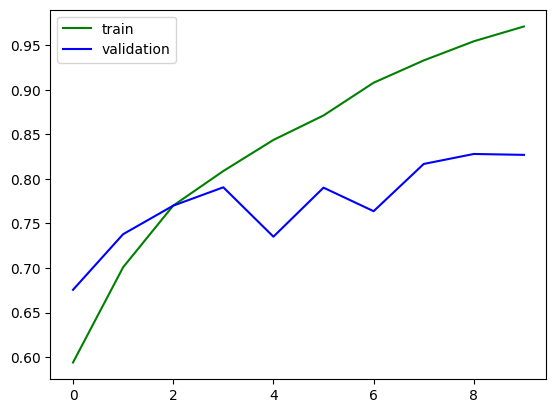

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='green',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

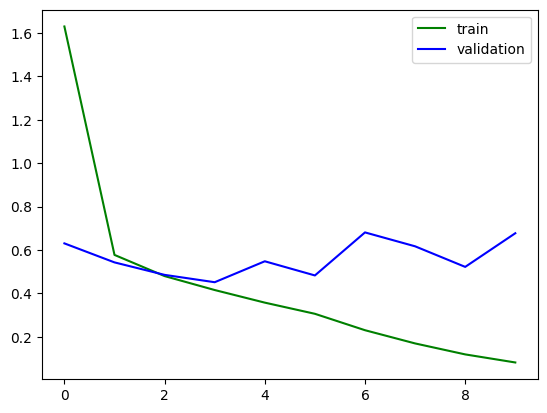

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='green',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# Here the model was overfitting but they can be corrected by using batchNormalization and dropout layers
